#### Visualisation for original simulated datasets and motion parameters

Motion Parameters (mot.xy): [-10.  10.]


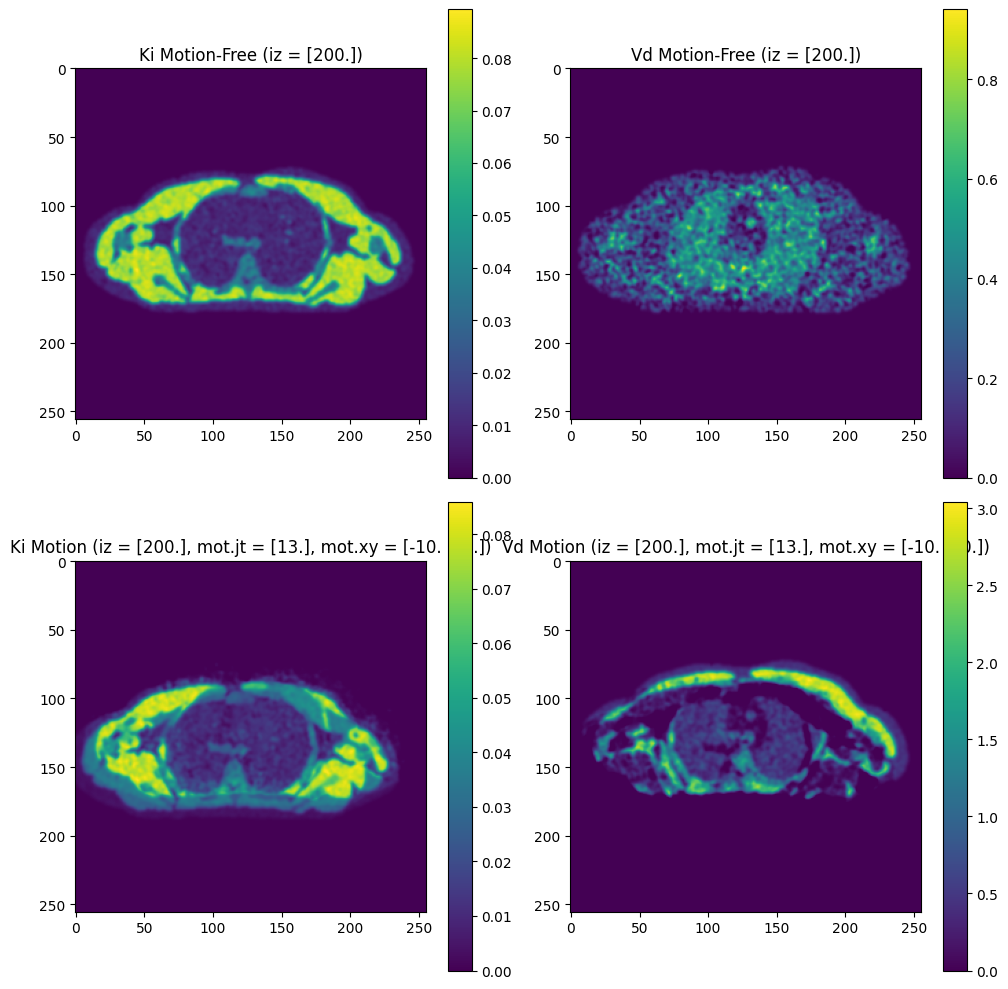

In [1]:
import h5py
import matplotlib.pyplot as plt

# Open the HDF5 file
filename = 'dataset_e_test_crop.h5'  # Replace with your file name
with h5py.File(filename, 'r') as file:
    # Specify which pair and group you want to extract data from
    pair_num = 11
    
    # Extracting Motion-Free images
    ki_motion_free = file[f'/MotionFreeData_{pair_num}/Ki_e'][:]
    vd_motion_free = file[f'/MotionFreeData_{pair_num}/Vd_e'][:]
    
    # Extracting Motion images
    ki_motion = file[f'/MotionData_{pair_num}/Ki_e'][:]
    vd_motion = file[f'/MotionData_{pair_num}/Vd_e'][:]
    
    # Extracting metadata for motion images
    mot_xy = file[f'/MotionData_{pair_num}'].attrs['mot.xy']
    mot_jt = file[f'/MotionData_{pair_num}'].attrs['mot.jt']
    iz = file[f'/MotionData_{pair_num}'].attrs['iz']
    print(f'Motion Parameters (mot.xy): {mot_xy}')

# Display the images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

im1 = axes[0, 0].imshow(ki_motion_free)
axes[0, 0].set_title('Ki Motion-Free (iz = {})'.format(iz))
fig.colorbar(im1, ax=axes[0, 0])

im2 = axes[0, 1].imshow(vd_motion_free)
axes[0, 1].set_title('Vd Motion-Free (iz = {})'.format(iz))
fig.colorbar(im2, ax=axes[0, 1])

im3 = axes[1, 0].imshow(ki_motion)
axes[1, 0].set_title(f'Ki Motion (iz = {iz}, mot.jt = {mot_jt}, mot.xy = {mot_xy})')
fig.colorbar(im3, ax=axes[1, 0])

im4 = axes[1, 1].imshow(vd_motion)
axes[1, 1].set_title(f'Vd Motion (iz = {iz}, mot.jt = {mot_jt}, mot.xy = {mot_xy})')
fig.colorbar(im4, ax=axes[1, 1])

plt.tight_layout()
plt.show()


#### Visualisation for Model generated images, motion and motion-free images

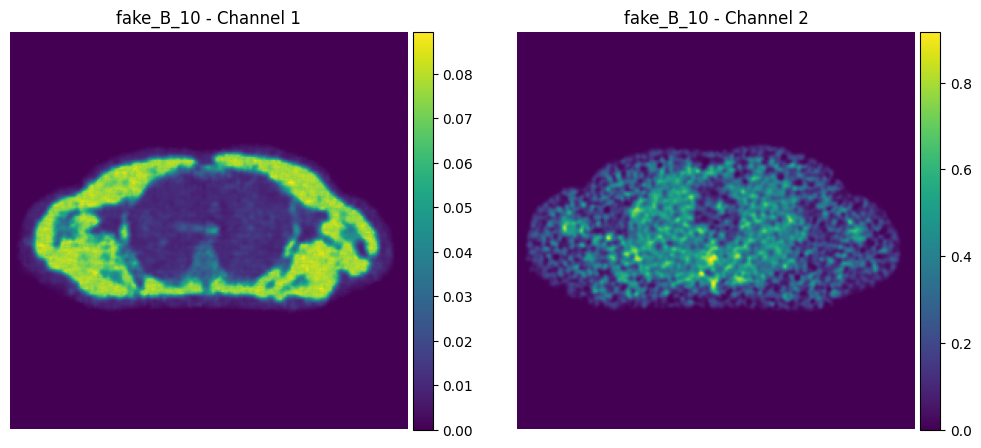

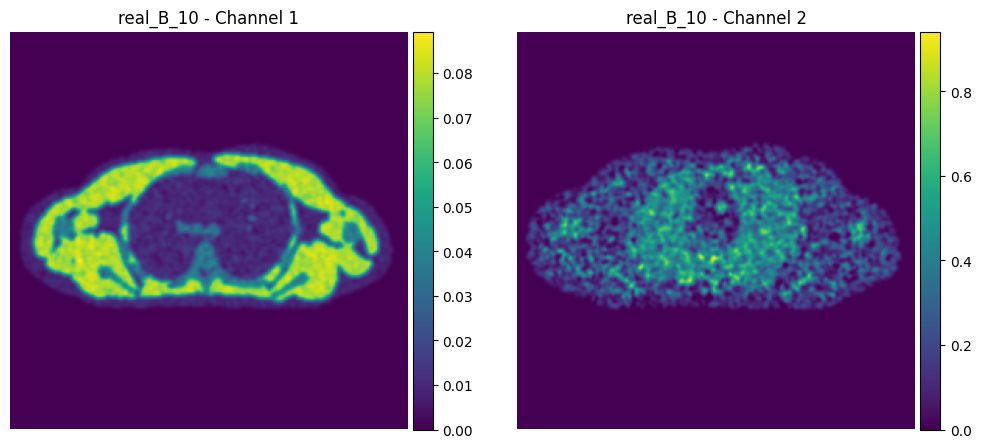

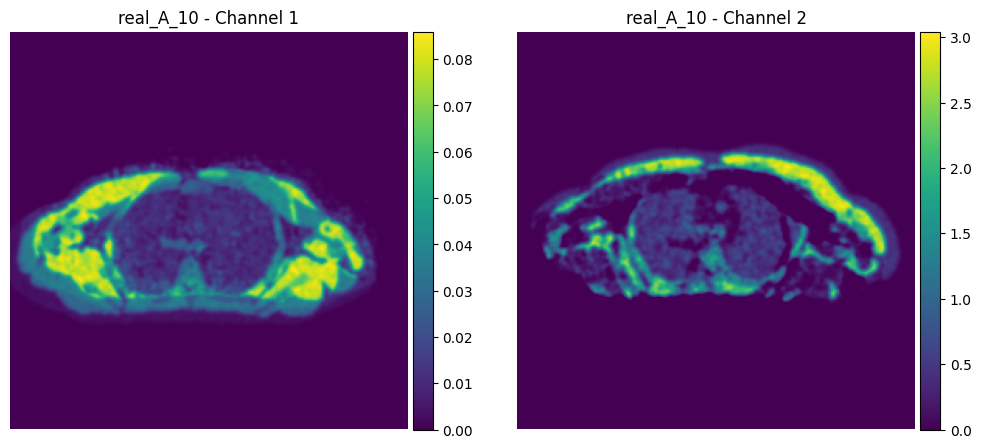

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_image(img, title):
    fig, axs = plt.subplots(1, img.shape[0], figsize=(12,12))
    for i in range(img.shape[0]):
        im = axs[i].imshow(img[i])
        axs[i].set_title(f'{title} - Channel {i+1}')
        axs[i].axis('off')
        
        # create an axes on the right side of axs[i]. The width of cax will be 5% of axs[i] and the padding between cax and axs[i] will be fixed at 0.05 inch.
        divider = make_axes_locatable(axs[i])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        
        fig.colorbar(im, cax=cax)
    plt.show()

def view_images(index):
    folder_path = "test_results_a"
    file_names = ['fake_B_', 'real_B_', 'real_A_']
    for name in file_names:
        file_path = os.path.join(folder_path, f"{name}{index}.npy")
        if os.path.exists(file_path):
            data = np.load(file_path)
            plot_image(data.squeeze(), f"{name}{index}")
        else:
            print(f"The file {file_path} does not exist.")

# Specify index you want to check, correspond to above original codes index-1
view_images(10)


#### Crop original data for region of interest (400x400 -> 256x256)

In [ ]:
import h5py
import numpy as np

# Open the source HDF5 file
filename = 'dataset_e_test.h5'  # Replace with your file name
with h5py.File(filename, 'r') as file:
    # Open the target HDF5 file
    with h5py.File('dataset_e_test_crop.h5', 'w') as file_crop:
        # Loop over the pairs
        for pair_num in range(1, 101):  # Adjust this as per your dataset
            # Extracting Motion-Free images
            ki_motion_free = file[f'/MotionFreeData_{pair_num}/Ki_e'][:]
            vd_motion_free = file[f'/MotionFreeData_{pair_num}/Vd_e'][:]

            # Extracting Motion images
            ki_motion = file[f'/MotionData_{pair_num}/Ki_e'][:]
            vd_motion = file[f'/MotionData_{pair_num}/Vd_e'][:]

            # Cropping images
            ki_motion_free = ki_motion_free[72:-72, 72:-72]
            vd_motion_free = vd_motion_free[72:-72, 72:-72]
            ki_motion = ki_motion[72:-72, 72:-72]
            vd_motion = vd_motion[72:-72, 72:-72]

            # Create new groups
            grp_free = file_crop.create_group(f'MotionFreeData_{pair_num}')
            grp_motion = file_crop.create_group(f'MotionData_{pair_num}')

            # Store cropped images in new HDF5 file
            grp_free.create_dataset('Ki_e', data=ki_motion_free)
            grp_free.create_dataset('Vd_e', data=vd_motion_free)
            grp_motion.create_dataset('Ki_e', data=ki_motion)
            grp_motion.create_dataset('Vd_e', data=vd_motion)

            # Copy attributes from source file to target file
            grp_motion.attrs['mot.xy'] = file[f'/MotionData_{pair_num}'].attrs['mot.xy']
            grp_motion.attrs['mot.jt'] = file[f'/MotionData_{pair_num}'].attrs['mot.jt']
            grp_motion.attrs['iz'] = file[f'/MotionData_{pair_num}'].attrs['iz']
